# Part A – Exploratory data analysis and data visualisation 

1. Using the pandas library, read the file dataset1.csv into a dataframe. Print or display the first five rows of the dataset. [1 mark]

In [1]:
import pandas as pd

dataset1 = pd.read_csv('dataset1.csv')
dataset1.head()

,Monastery,Latitude,Longitude,City,Country,Administrative Region,Historical Region,Starting,Ending,Monastery_index
0,Cistercians,47.13,15.28,Seckau,Austria,Steiermark,STYRIA (AUSTRIA),1130,1958,0
1,Cistercians,48.05,16.13,Vienne,Austria,Niederoesterreich,STYRIA (AUSTRIA),1135,2011,0
2,Cistercians,48.61,15.20,Sanct Pölten,Austria,Niederoesterreich,STYRIA (AUSTRIA),1138,2011,0
3,Cistercians,48.20,14.74,Linz,Austria,Oberoesterreich,STYRIA (AUSTRIA),1142,1784,0
4,Cistercians,48.32,14.17,Linz,Austria,Oberoesterreich,STYRIA (AUSTRIA),1146,1945,0


2. Make a scatterplot from the dataset, with the Longitude column on the x axis, the Latitude column on the y axis, and the colour corresponding to the Monastery_index column. Within the scatterplot function, set the colour map to ’rainbow’. The result should be a scatterplot showing the position of every monastery, with different colours for monasteries with different values in Monastery_index.  [1 mark]

<Axes: xlabel='Longitude', ylabel='Latitude'>

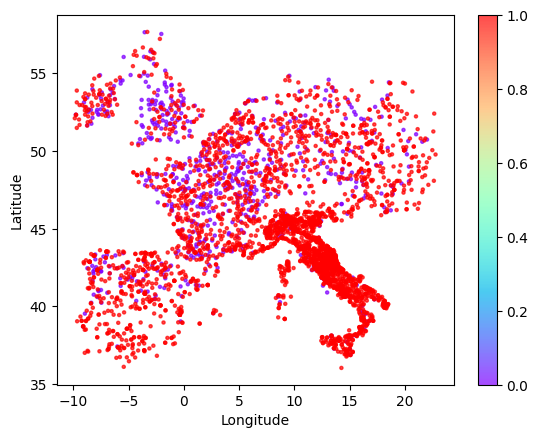

In [2]:
df1 = pd.DataFrame(dataset1)

df1.plot(kind='scatter', x='Longitude', y='Latitude', c=df1['Monastery_index'], cmap='rainbow', alpha=0.7, s=5)

3. Plot a histogram for the monastery starting year of activity, represented in the Starting column.
Add the title “Starting year” to the plot. [1 mark]

Text(0.5, 1.0, 'Starting Year')

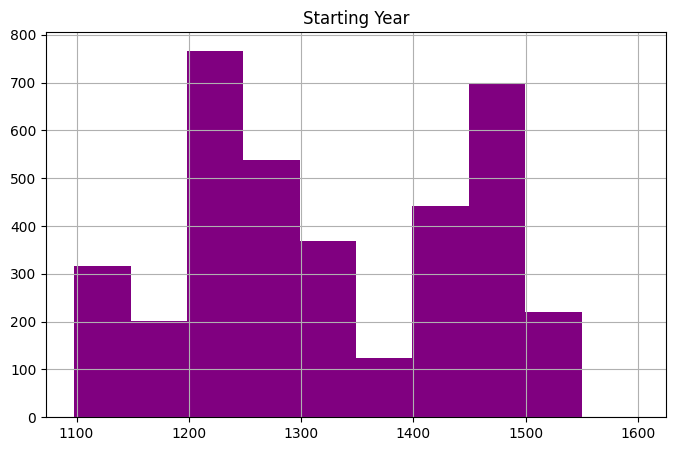

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 5))

df1['Starting'].hist(color='purple')
plt.title('Starting Year')

4. Make a figure with two histograms, still using the Starting column:

a) One histogram representing the Cistercian monasteries, corresponding to rows in the dataframe where the Monastery column is equal to 'Cistercians'.

b) And one histogram representing the Franciscan monasteries, corresponding to rows in the dataframe where the Monastery column is equal to 'Franciscans'.

c) Add a legend indicating which histogram corresponds to which type of monastery.

d) Add the title “Starting year” to the figure. 

[2 marks]

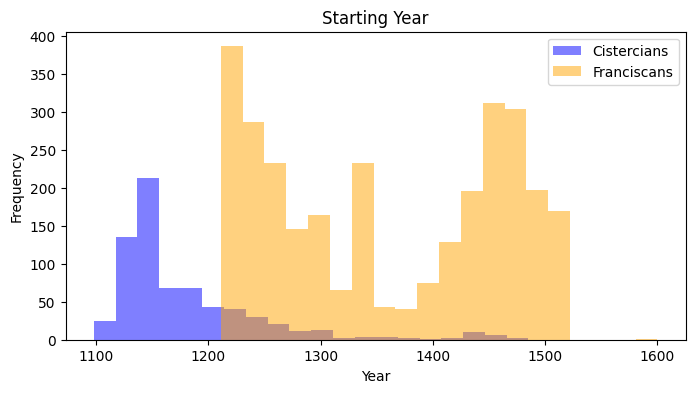

In [4]:
cistercian_data = df1[df1['Monastery'] == 'Cistercians']
franciscan_data = df1[df1['Monastery'] == 'Franciscans']

plt.figure(figsize=(8, 4))

plt.hist(cistercian_data['Starting'], bins=20, alpha=0.5, label='Cistercians', color='blue')
plt.hist(franciscan_data['Starting'], bins=20, alpha=0.5, label='Franciscans', color='orange')

plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Starting Year')
plt.legend()

plt.show()

5. Repeat numbers 3 and 4, but for the Ending column. Add the title “Ending year” to the plot.
[2 marks]

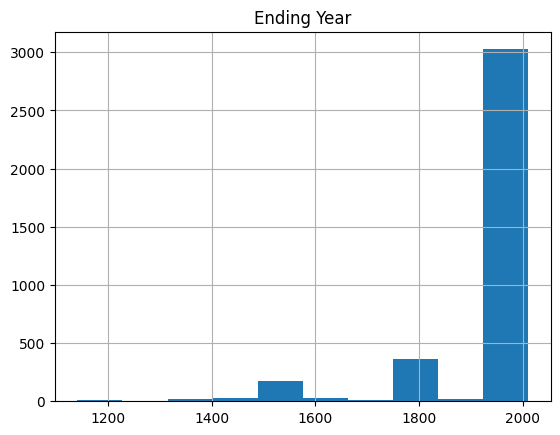

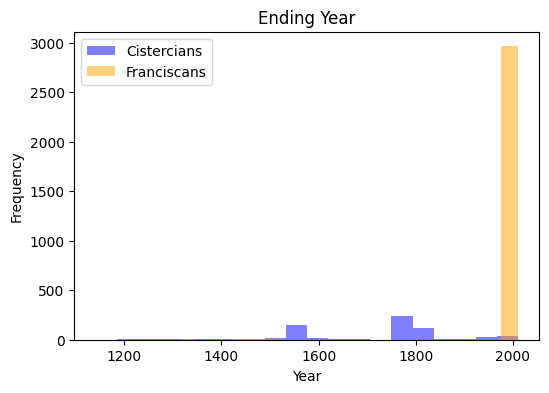

In [5]:
df1['Ending'].hist()
plt.title('Ending Year')

plt.figure(figsize=(6, 4))

plt.hist(cistercian_data['Ending'], bins=20, alpha=0.5, label='Cistercians', color='blue')
plt.hist(franciscan_data['Ending'], bins=20, alpha=0.5, label='Franciscans', color='orange')

plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Ending Year')
plt.legend()

plt.show()

6. Count the number of times each country appears in the Country column. Use that to make a bar plot, showing one bar for each country, with the bar height representing how many times each country appears in the Country column. This corresponds to the number of monasteries found in each country.
[2 marks]

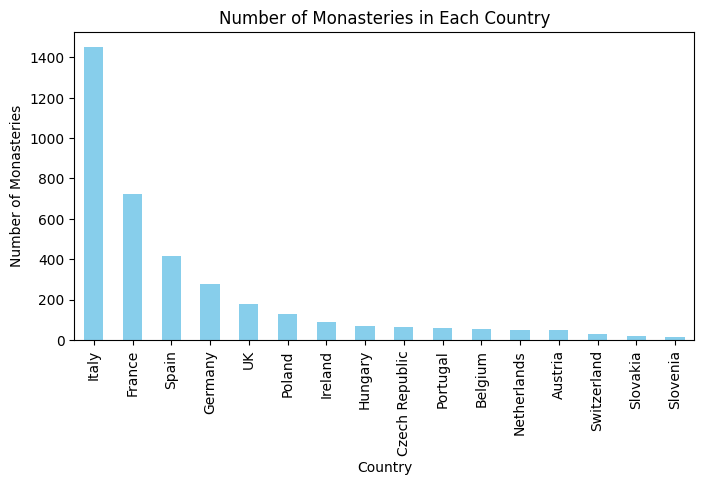

In [6]:
country_counts = df1['Country'].value_counts()

plt.figure(figsize=(8, 4))

country_counts.plot(kind='bar', color='skyblue')

plt.xlabel('Country')
plt.ylabel('Number of Monasteries')
plt.title('Number of Monasteries in Each Country')

plt.show()

_____________________

# Part B – Training classifiers

7.	Define a variable X corresponding to the Starting and Ending columns of the dataset, and a variable y corresponding to the Monastery_index column. [1 mark]

In [7]:
X = dataset1[['Starting', 'Ending']]
y = dataset1['Monastery_index']

8.	Perform a train-test split, separating X and y into a training test and a test set, leaving 33% of the data in the test set. [1 mark]

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

9.	Classification using a Perceptron:

a)	Fit a perceptron to the training data, and use it to predict y values for the test set.
[1 mark]

b)	Calculate the fraction of data points in the test set where the predicted y values and the actual y values differ. This fraction should be equal to zero if the prediction is perfect, and equal to 1 if the prediction is wrong for 100% of the test set. Print the value of that fraction in decimals (like 0.01, 0.2394, or 0.9999923).  [2 marks]

c)	Plot a confusion matrix showing how well the classifier performs on the test set. [1 mark]

d)	Treating “Franciscan” as “Positive” and “Cistercian” as “Negative”, Print out the precision, recall, accuracy and F1 score of the perceptron. [2 marks]

The fraction is:  0.1991769547325103



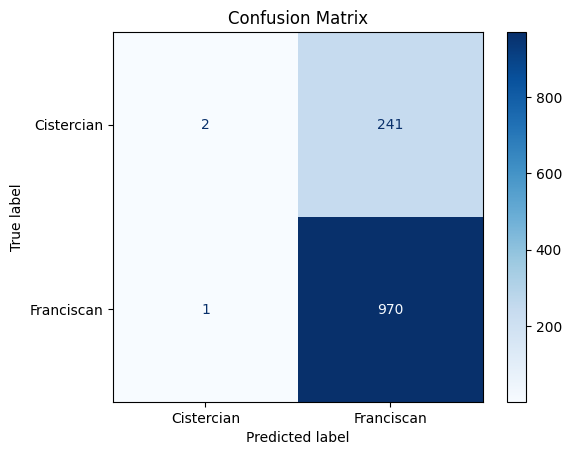


The precision score is: 0.800990916597853
The recall score is: 0.9989701338825953
The accuracy is: 0.800658978583196
The F1 score is: 0.8890925756186985


In [9]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay

# Part a)
perceptron = Perceptron()
perceptron.fit(X_train, y_train.values.ravel())
y_pred_p = perceptron.predict(X_test)

# Part b)
denominator = 1
numerator = 0

for x in range(len(y_test)):
    denominator += 1
    if y_test.values[x] != y_pred_p[x]:
        numerator += 1
    fraction = (numerator) / (denominator)

print('The fraction is: ', fraction)
print()

# Part c)
conf_matrix = confusion_matrix(y_test, y_pred_p)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Cistercian', 'Franciscan'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Part d)
precision = precision_score(y_test, y_pred_p, zero_division=1)
recall = recall_score(y_test, y_pred_p)
accuracy = accuracy_score(y_test, y_pred_p)
f1 = f1_score(y_test, y_pred_p)

print()
print("The precision score is:", precision)
print("The recall score is:", recall)
print("The accuracy is:", accuracy)
print("The F1 score is:", f1)

10.	Classification using Logistic Regression: do the same as the question above, but using the logistic regression classifier. [4 marks]

The fraction is:  0.574485596707819



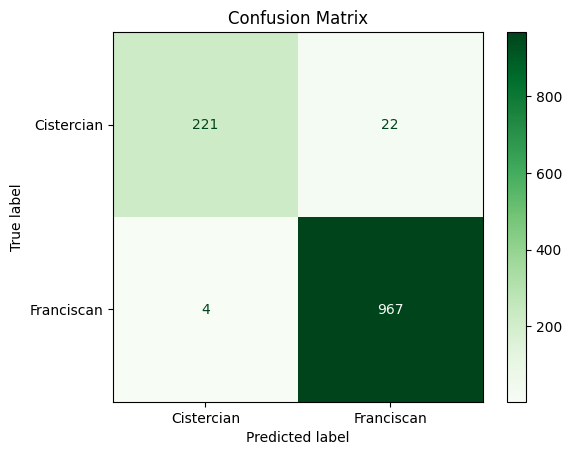


The precision score is: 0.9777553083923155
The recall score is: 0.995880535530381
The accuracy is: 0.9785831960461285
The F1 score is: 0.9867346938775511



In [10]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

y_pred_l = logistic_regression.predict(X_test)

#Fraction:

denominator = 1
numerator = 0

for x in range(len(y_test)):
    denominator += 1
    if y[x] != y_pred_l[x]:
        numerator += 1
    fraction = (numerator)/(denominator)

print('The fraction is: ', fraction)

print()

#Confusion Matrix:

conf_matrix = confusion_matrix(y_test, y_pred_l)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Cistercian', 'Franciscan'])
disp.plot(cmap='Greens', values_format='d')
plt.title('Confusion Matrix')
plt.show()


precision_l = precision_score(y_test, y_pred_l)
recall_l = recall_score(y_test, y_pred_l)
accuracy_l = accuracy_score(y_test, y_pred_l)
f1_l = f1_score(y_test, y_pred_l)

#Precision, recall, accuracy and F1 score of the logistic regression:

print()

print("The precision score is:", precision_l)
print("The recall score is:", recall_l)
print("The accuracy is:", accuracy_l)
print("The F1 score is:", f1_l)

print()

For open-ended questions like the ones below, write your answers in a new cell of code, either as a commented-out line starting with #, or as a markdown cell. Indicate what question you’re answering, by copying the question as well. For example:

11.	Explain the importance of the train-test split in machine learning. What might happen if you don’t have a proper split? [ 2 marks ]

The train-test split is important as it allows you to split your data such that your model can be trained on the training set and then tested on the testing set to see if the model is perfroming accurately and as expected. To have a proper split your data needs to be larger so to be more accurately however if it is too large the model may overfit the training data, meaning it learns the training data too well and therefore may be inaccurate on the test data. The test set must also be large as a larger test set allows for more reliable results, however, too large can cause it to take longer to run and may be less representitive of the model.

12.	Which classifier (Perceptron or Logistic Regression) performed better at this task? Explain how you’ve arrived at this answer. [4 marks] 

The Logistic Regression classifier performed better at the task. This is because the perceptrons fraction was 0.5753 whereas the logistic regression is 0.5415 therefore it was slightly more accurate. The accuracy and precision scores (0.9777594728171335 and 0.977022977022977 respectively) for logistic regression are higher than that of the perceptron (0.8088962108731467 and 0.8088962108731467 respectively). (All numbers are prone to change when re-ran)

13.	If you run the code from questions 8, 9, and 10 again, do the scores (precision, recall, accuracy, F1) change? Why (or why not)? Explain where those scores come from, and how do they change (or don't change) if you run the code again. [3 marks]

The scores do not change because the model trains on the same split of the dataset everytime you run it and then tests itself on the other split of the dataset therefore the same model will be created everytime and it wil give the same answers everytime. However if you rerun all cells or just the cell with the train-test split, the splits used will change and therefore there may be some slight variation in results obtained but not drastically.

_______________

# Part C – Linear Regression

14. Read the file `dataset2.csv` into a dataframe. Make four scatterplots, with different variables (different columns) on the x and y axes, with the variable `quality` on the colour axis. For each scatterplot, choose a different pair of x and y variables, which cannot include `quality`. [1 mark]

<Axes: xlabel='density', ylabel='pH'>

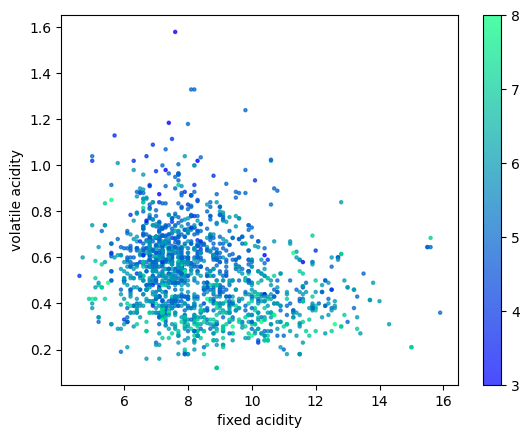

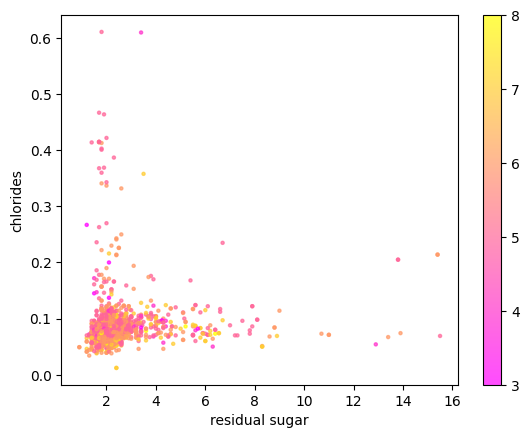

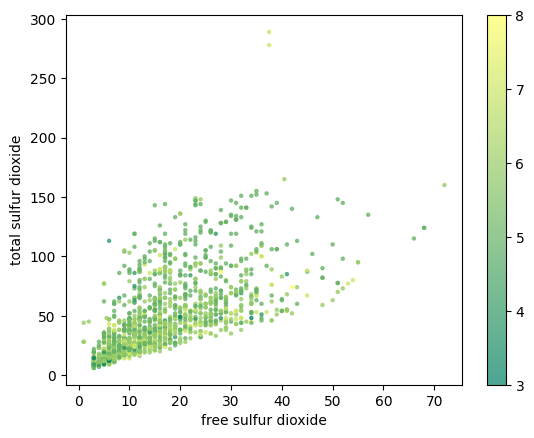

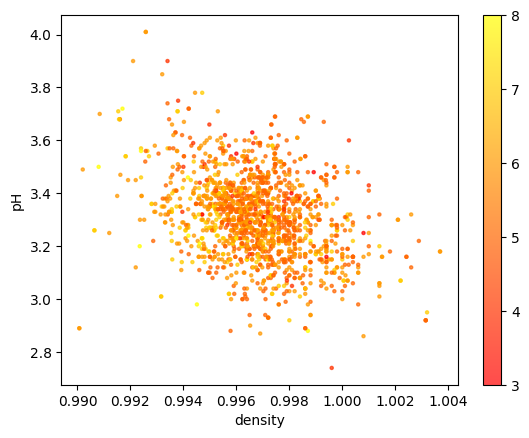

In [11]:
dataset2 = pd.read_csv('dataset2.csv')
dataset2.head()

df2 = pd.DataFrame(dataset2)

df2.plot(kind='scatter', x='fixed acidity', y='volatile acidity', c=df2['quality'], cmap='winter', alpha=0.7, s=5)

df2.plot(kind='scatter', x='residual sugar', y='chlorides', c=df2['quality'], cmap='spring', alpha=0.7, s=5)

df2.plot(kind='scatter', x='free sulfur dioxide', y='total sulfur dioxide', c=df2['quality'], cmap='summer', alpha=0.7, s=5)

df2.plot(kind='scatter', x='density', y='pH', c=df2['quality'], cmap='autumn', alpha=0.7, s=5)

15. Print the Pearson correlation between the pairs of variables you have included in the scatterplots. 
For every pair of variables, print the names of the variables, and the corresponding correlation. 
[1 mark]

In [12]:
import scipy.stats

x1 = np.array(df2['fixed acidity'])
y1 = np.array(df2['volatile acidity'])
fixed_volatile = scipy.stats.pearsonr(x1, y1)
print(f'Pearson correlation between fixed acidity and volatile acidity: {fixed_volatile[0]}')
print()

x2 = np.array(df2['residual sugar'])
y2 = np.array(df2['chlorides'])
fixed_volatile = scipy.stats.pearsonr(x2, y2)
print(f'Pearson correlation between residual sugar and chlorides: {fixed_volatile[0]}')
print()

x3 = np.array(df2['free sulfur dioxide'])
y3 = np.array(df2['total sulfur dioxide'])
fixed_volatile = scipy.stats.pearsonr(x3, y3)
print(f'Pearson correlation between free sulfur dioxide and total sulfur dioxide: {fixed_volatile[0]}')
print()

x4 = np.array(df2['density'])
y4 = np.array(df2['pH'])
fixed_volatile = scipy.stats.pearsonr(x4, y4)
print(f'Pearson correlation between density and pH: {fixed_volatile[0]}')
print()

Pearson correlation between fixed acidity and volatile acidity: -0.2561308947703822

Pearson correlation between residual sugar and chlorides: 0.05560953520353213

Pearson correlation between free sulfur dioxide and total sulfur dioxide: 0.6676664504810214

Pearson correlation between density and pH: -0.34169933478503106



16. Linear regression: [2 marks]
    
a) Choosing the input variable X corresponds to any three columns of the dataset, except for `quality`, and the variable y corresponds to the `quality` column.

b) Fit a linear regression between X and y.

c) Print out the R2 score of the linear regression.

d) Print out the linear regression model’s slope coefficients and intercept.

In [13]:
from sklearn.linear_model import LinearRegression

X = df2[['fixed acidity','volatile acidity','citric acid']]
y = df2['quality']

model = LinearRegression()
model.fit(X, y)

R2 = model.score(X, y)
print("the R^2 score is:", R2)

coefficients = model.coef_
intercept = model.intercept_

print("The slope coefficients are:", coefficients)
print("The intercept is:", intercept)

the R^2 score is: 0.15317614697641913
The slope coefficients are: [ 0.01395138 -1.74590349 -0.03196261]
The intercept is: 6.450136858225835


17. K-fold cross-validation [3 marks]

a) Using the same X and y variables defined in the question above, perform a K-fold cross-validation of the linear regression model, with K = 10.

b) For each fold, calculate the R2 score.

c) Print the mean and standard deviation of the five R2 scores.

In [14]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

K = 10
kf = KFold(n_splits=K)

r2_scores = []

for fold, (train_index, test_index) in enumerate(kf.split(X), start=1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

    print(f'Fold {fold}: R2 score = {r2}')

mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

print(f'\nMean R2 score: {mean_r2}')
print(f'Standard deviation of R2 scores: {std_r2}')

Fold 1: R2 score = -0.30305087106036765
Fold 2: R2 score = 0.1708158043417275
Fold 3: R2 score = -0.11292551876784929
Fold 4: R2 score = 0.1261870224960715
Fold 5: R2 score = -0.15285682623158325
Fold 6: R2 score = 0.1578501181054761
Fold 7: R2 score = -0.04533954956737474
Fold 8: R2 score = 0.1666190283486504
Fold 9: R2 score = 0.1699508780905351
Fold 10: R2 score = 0.1451221263075484

Mean R2 score: 0.032237221206283403
Standard deviation of R2 scores: 0.1635065746598088


18.	If, rather than choosing three columns, you had used more columns to predict quality, would the R2 score of your model necessarily be higher? Why/why not? In which circumstances would it be higher or not? (Feel free to try it! But please provide a justification for your answer) [3 marks]

The relationship between the number of columns and R2 score is not direct so there won't necessarily be a higher score. Some columns may be redundant or contain useless information which can negatively affect the R2 score. Also too much data could cause overfitting of the model. It will increase when more relevant data is given or if the model is underfitted

19.	Imagine you have two linear regressions, one with R2 = 0.80 and another with R2 = 0.90. Under what circumstances would the first model be preferable over the second one? What if instead you had two classifiers, one with accuracy = 80% and another with accuracy = 90%? [3 marks]

The first model would be preferred when there is some concern surrounding overfitting as the second is more accurate however may have been overfitted. In terms of classifiers the second is preferrable when accuracy is a requirement however the first may be preferable as it may make fewer mistakes.

_____________________

# Part D – Clustering

20. K-means clustering:

a) Read the file `dataset3.csv` into a dataframe.

b) Define a variable X corresponding to the `Longitude` and `Latitude` columns of the dataset.

c) Using the K-means clustering algorithm and the variable X, cluster the trees 3 times, using k = 5, 10, 15.

d) Make a scatterplot showing the results of each clustering, with one colour for each cluster.
Suggestion: use a categorical colour map such as tab10 or tab20.
[2 marks]

In [15]:
dataset3 = pd.read_csv('dataset3.csv')
dataset3.head()

,Tree_ID,Address,Town,Tree_Species,Species_Desc,Common_Name,Age_Desc,Height,Spread,Trunk,Actual_Trunk,Condition,Latitude,Longitude
0,27092,"Clonard Court, Balbriggan",Balbriggan,ACSA,Acer saccharinum,Silver Maple,Semi-Mature,5.1-10 metres,3 to 6 metres,11cm to 20cm,18cm,Good,53.606325,-6.186424
1,29144,"Ridgewood Avenue, Forrest Great",Swords South,TICO,Tilia cordata,Small-Leafed Lime,Young,Up to 5 metres,Up to 3 metres,1cm - 10cm,10cm,Fair - Poor,53.447465,-6.247613
2,29160,"Ridgewood Avenue, Forrest Great",Swords South,TICO,Tilia cordata,Small-Leafed Lime,Young,Up to 5 metres,Up to 3 metres,11cm to 20cm,11cm,Good,53.447695,-6.248258
3,29400,"Ridgewood Avenue, Forrest Great",Swords South,TICO,Tilia cordata,Small-Leafed Lime,Young,Up to 5 metres,Up to 3 metres,1cm - 10cm,10cm,Good,53.445606,-6.246236
4,246560,"Lanesborough Grove, Saint Margaret's",Santry,TICO,Tilia cordata,Small-Leafed Lime,Young,Up to 5 metres,3 to 6 metres,11cm to 20cm,13cm,Fair to Good,53.404309,-6.291646


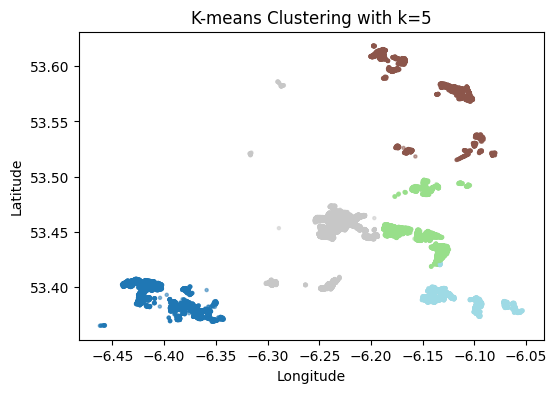

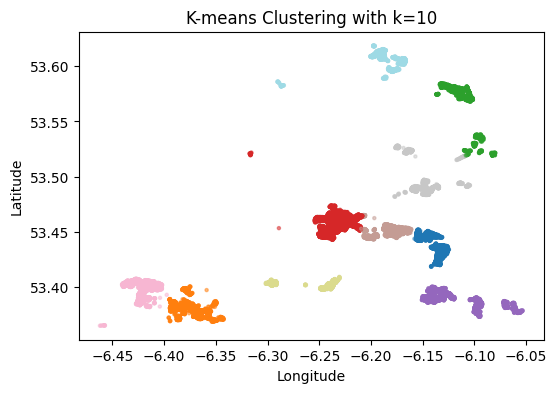

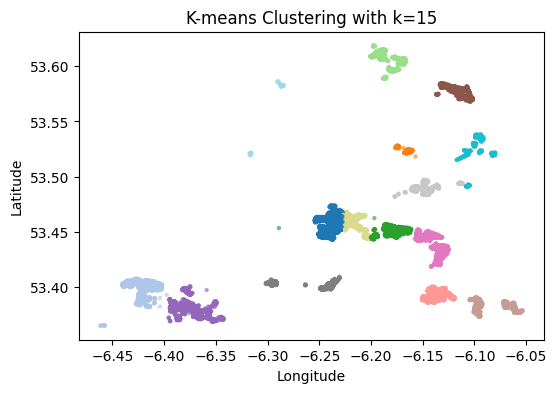

In [16]:
from sklearn.cluster import KMeans

X = dataset3[['Longitude', 'Latitude']]

k_values = [5, 10, 15]
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10)
    dataset3[f'Cluster_{k}'] = kmeans.fit_predict(X)

colors = plt.get_cmap('tab20')

for k in k_values:
    plt.figure(figsize=(6, 4))
    plt.scatter(dataset3['Longitude'], dataset3['Latitude'], alpha=0.5, s=5, c=dataset3[f'Cluster_{k}'], cmap=colors)
    plt.title(f'K-means Clustering with k={k}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

21. DBSCAN clustering:

a) Using the same X variable as above, using the DBSCAN clustering algorithm, cluster the trees a total of 4 times, setting the eps parameter to 0.001, 0.005, 0.01, 0.05.

b) Make a scatterplot showing the results of each clustering, with one colour for each cluster. 
Suggestion: use a categorical colour map such as tab10 or tab20.
[2 marks]

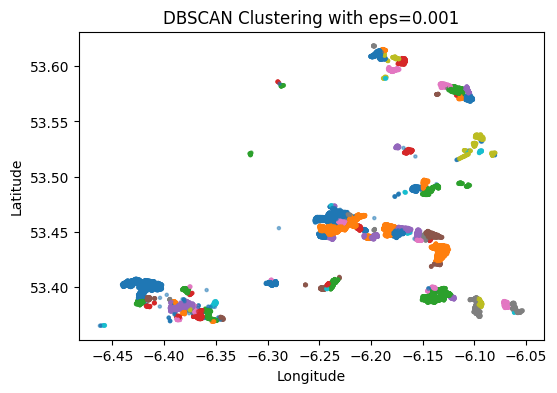

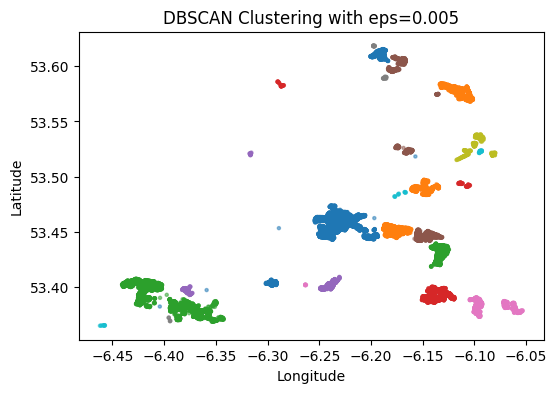

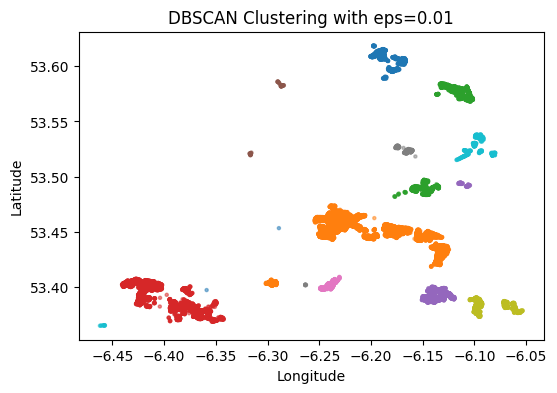

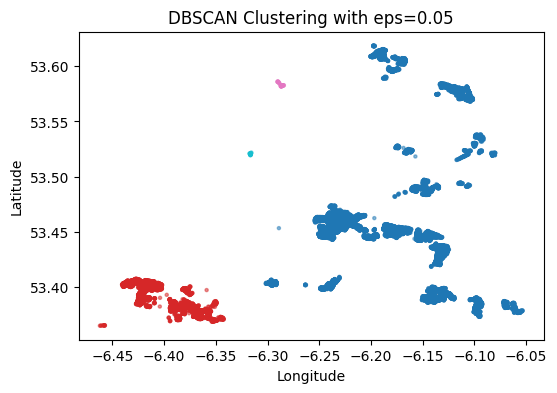

In [17]:
from sklearn.cluster import DBSCAN

eps_values = [0.001, 0.005, 0.01, 0.05]

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dataset3[f'DBSCAN_Cluster_{eps}'] = dbscan.fit_predict(X)

colors = plt.get_cmap('tab10')

for eps in eps_values:
    plt.figure(figsize=(6, 4))
    plt.scatter(dataset3['Longitude'], dataset3['Latitude'], alpha=0.5, s=5, c=dataset3[f'DBSCAN_Cluster_{eps}'], cmap=colors)
    plt.title(f'DBSCAN Clustering with eps={eps}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

22. Using the Silhouette score, compare the 3 runs of K-means and the 4 runs of DBSCAN. Which one of the 7 runs produces the 
best clustering, according to the Silhouette score? [2 marks]

In [18]:
from sklearn.metrics import silhouette_score

k_silhouette_scores = []

best_k = None
best_eps = None
k_means_best = float('-inf')
dbscan_best = float('-inf')

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10)
    labels = kmeans.fit_predict(X)
    silhouette_score_k = silhouette_score(X, labels)
    k_silhouette_scores.append(silhouette_score_k)

    if silhouette_score_k > k_means_best:
        k_means_best = silhouette_score_k
        best_k = k

dbscan_silhouette_scores = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(X)
    silhouette_score_dbscan = silhouette_score(X, labels)
    dbscan_silhouette_scores.append(silhouette_score_dbscan)
    
    if silhouette_score_dbscan > dbscan_best:
        dbscan_best = silhouette_score_dbscan
        best_eps = eps

print("The best k-means value of k is", best_k, "with a silhouette score of:", k_means_best)
print("The best DBSCAN eps value is", best_eps, "with a silhouette score of:", dbscan_best)

if dbscan_best > k_means_best:
    print("Therefore, the best clustering is produced by DBSCAN")

elif dbscan_best < k_means_best:
    print("Therefore, the best clustering is produced by K-means")

else:
    ("Therefore, neither K-means or DBSCAN is better")

The best k-means value of k is 15 with a silhouette score of: 0.6392469147112925
The best DBSCAN eps value is 0.005 with a silhouette score of: 0.5407076619493659
Therefore, the best clustering is produced by K-means


23. Using the Davies-Bouldin score, compare the 3 runs of K-means and the 4 runs of DBSCAN. Which one of the 7 runs produces the best clustering according to the Davies-Bouldin score? [2 marks]

In [19]:
from sklearn.metrics import davies_bouldin_score

best_k = None
best_eps = None
k_means_best = float('-inf')
dbscan_best = float('-inf')

k_davies_bouldin_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10)
    labels = kmeans.fit_predict(X)
    davies_bouldin_score_k = davies_bouldin_score(X, labels)
    k_davies_bouldin_scores.append(davies_bouldin_score_k)

    if davies_bouldin_score_k > k_means_best:
        k_means_best = davies_bouldin_score_k
        best_k = k

dbscan_davies_bouldin_scores = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(X)
    davies_bouldin_score_dbscan = davies_bouldin_score(X, labels)
    dbscan_davies_bouldin_scores.append(davies_bouldin_score_dbscan)

    if davies_bouldin_score_dbscan > dbscan_best:
        dbscan_best = davies_bouldin_score_k
        best_eps = eps

print("The best k-means value of k is", best_k, "with a Davies-Bouldin score of:", k_means_best)
print("The best DBSCAN eps value is", best_eps, "with a Davies-Bouldin score of:", dbscan_best)

if dbscan_best > k_means_best:
    print("Therefore, the best clustering is produced by DBSCAN")

elif dbscan_best < k_means_best:
    print("Therefore, the best clustering is produced by K-means")

else:
    ("Therefore, neither K-means or DBSCAN is better")

The best k-means value of k is 5 with a Davies-Bouldin score of: 0.585868762860019
The best DBSCAN eps value is 0.05 with a Davies-Bouldin score of: 0.38861426016883555
Therefore, the best clustering is produced by K-means


24. Using another clustering algorithm (not K-means, not DBSCAN), and a range of hyperparameter values if appropriate, cluster the trees according to their latitude and longitude, as above. According to the silhouette and Davies-Bouldin scores, does any of your model runs produce better clustering? [2 marks]

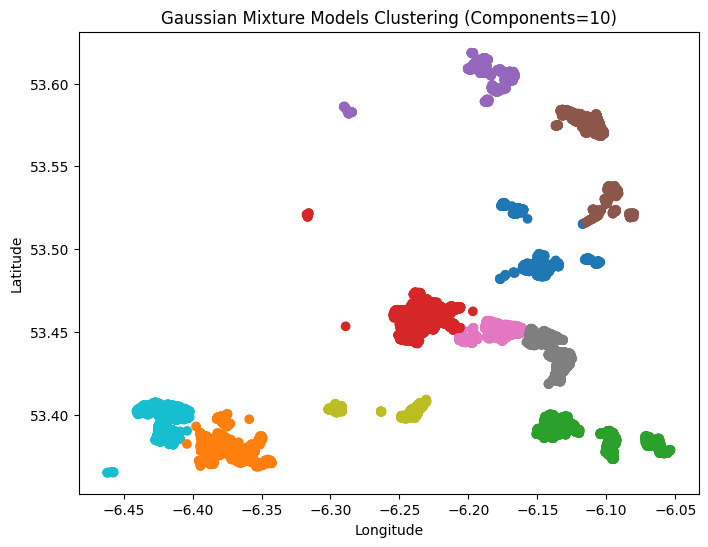

In [20]:
from sklearn.mixture import GaussianMixture

components_range = range(2, 11)
gmm_scores = []

for n_components in components_range:
    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(X)
    bic_score = gmm.bic(X)
    gmm_scores.append(bic_score)

optimal_components = components_range[np.argmin(gmm_scores)]

gmm_optimal = GaussianMixture(n_components=optimal_components)
labels_gmm = gmm_optimal.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X['Longitude'], X['Latitude'], c=labels_gmm, cmap='tab10')
plt.title(f'Gaussian Mixture Models Clustering (Components={optimal_components})')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

25. Usually, DBSCAN takes longer than K-means to run, and the time it takes to run is affected by the eps parameter. Explain why that is the case. [4 marks]

K-means is faster than DBSCAN because K-means doesn't consider outliers and clusters all data as if it were a perfectly spherical, well seperated clusters. Whereas DBSCAN takes into account outliers and irregularly shaped data and eliminates outliers depending on the eps parameter. The eps parameter defines the radius around a point which includes all 'neighboours' that can form a cluster. Therefore if eps is higher there will be less clusters and it will be quicker whereas if eps is smaller there will be many more clusters, more outliers and the clustering will take longer to run.

26. Provide an example of one case in which it might be better to use DBSCAN rather than K-means, and an example of one case in which it might be better to use K-means rather than DBSCAN. Explain why, in both cases. [4 marks]

DBSCAN is better for irregular data and nested clusters as it doesn't depend on the shape of your data and is able to eliminate any outliers, an example where it is better is in retail when reviewing customer purchasing data. On the pther hand K-means is better when dealing with spherical clusters as it clusters all data together as opposed to reviewing outliers and is faster, an example where this would be useful is comparing the petal width and length of flowers as this will remail spherical.

_____________________

# Part E – Model selection

27. Consider the figure in the PDF and compare models A and B. In each case, what difference would it make to add more training examples to the training set? Explain your reasoning. [4 marks]

Model A is more optimal as there is little difference between the training and testing set however it has a high error, therefore adding more training examples to the training set will have little or no affect on the model. Model B can be seen to be underfitted as the test shows high error, however it can be seen that as the training set increases the testing set converges towards it therefore adding more training examples to the set would make the model increasingly accurate.

28.	Consider the second figure in the PDF and compare models A, B, and C. What is the difference between the three models? How does that relate to the bias-variance trade-off? [6 marks]

Model A can be described as being underfit because there is high error for the training and testing set implying there was not enough data for the model to be accurate. On the other hand, Model B can be described as the most optimal of the three because there is little difference between the training and testing set implying the model wasn't overfit to the training data and performed well on the testing set, and also the error is relatively low showing it was accurate. Finally, Model C can be seen to be overfit due to the fact there is a large error difference between the training and testing set, as the testing set is so high the model overfit the training set and this shows in its performance on the testing set. The bias-cariance trade off involves finding a model that is complex enough to identify patterns in the data (high bias) which causes udnerfitting, but not so complex that its too sensitive to the training data (high variance) which causes overfitting. Therefore it can be inferred that Model A may have high bias, model C has high variance but the bias-variance trade off in B is low.

29.	What is overfitting? Why is that a problem, and how can one avoid it? [3 marks]

Overfitting is when a model learns not only underlying patterns in the training data but also captures the outliers and 'noise' present in that specific dataset which can decrease the accuracy of a model. When tested, the model may show a larger value of error as it has essentially memorised the training data causing it to perform poorly, limiting it's ability to make accurate predictions on unseen data. It can be avoided by a few processes, one being early stopping which involves pausing the training phase before the machine learning model learns the noise in the data. However, getting the timing right is important; else the model will still not give accurate results. Another is regularization which involves assigning importance to features of a training set so those of lower importance are ulitmately flagged to be ignored or taken less notice of. A final method is data augmentation which involves changing the data ever so slighlty every time a model is run so a training set appears unique to the model everytime, this can be done via trainsformations for example, preventing the data from overfitting characteristics 

________________

# Part F – Dimensionality reduction

Consider a scenario where you are working with a complex high-dimensional dataset derived from a biomedical application to detect a disease. The data is expected to have both linear and non-linear relationships, and you aim to reduce the dimensionality for the following purposes: first, to visualize the data in a lower-dimensional space to identify potential clusters or patterns that might indicate different disease states, and second, to preprocess the data for a downstream machine learning task, such as classification of samples into healthy or diseased states. 

30.	Discuss the advantages and disadvantages of using PCA, t-SNE, and UMAP for the visualization purpose, considering factors such as the preservation of local and global structures, computational efficiency, and the potential introduction of artifacts. [3 marks]

An advantage of PCA is that it is efficient and scales well meaning it can handle high-dimensional data such as that described in the biomedical application. PCA is also good for preserving global strucutres so can capture large scale patterns so will also be able to capture the linear relationships however it is less efficient in preserving local structures so may not identify the non-linear relationships. However t-SNE can be described as more intensive especially on larger datasets so will run slower than PCA but is far better at preserving local structures and can capture non-linear relationships but it is sensitive to artifacts. On the other hand UMAP can preserve both gloabl and local structures and is much less intensive than t-SNE whilst able to handle large structures but it is also prone to the potenital introduction of artifacts.

31.	Explain how the choice between these dimensionality reduction techniques might change when, after visualising, you want to do the preprocessing for the machine learning task. [3 marks]

If, after visaulising, the data appears to be mostly linear, PCA may be the best choice as it's better for preserving global structures and is also the least intensive so will run quickly but is less effective when relationships are non linear so t-SNE or UMAP may be better options depending on if the data is more local (t-SNE) or not (then use UMAP) esapecially if it is larger.

32.	Discuss the role of interpretability and stability in the choice of dimensionality reduction technique for both tasks. How might the stochastic nature of t-SNE and UMAP influence the reproducibility of your analyses, and how can PCA's linear assumptions limit its usefulness in capturing complex relationships in the data? [3 marks]

PCA splits high-dimensional datasets into a two-dimensional dataset (PC1 and PC2 oftentimes) so it is overall quite clear and easy to interpret but this is also due to a high variance and linear assumptions making the data like this removing more complex relationships. On the other hand t-SNE and UMAP can be described as being harder to interpret because of reduced dimentional interpretations however they show clusters and local relationships very well.

For stability, PCA is very good as it is not affected by stochastic elements (variables with uncertainty) so PCA is reproducible however t-SNE and UMAP are so multiple runs without any change to data and parameters may generate different results.

________________

# Part G – Applications of Machine Learning

33.	Discuss a scenario where a high accuracy rate might be misleading in evaluating the performance of a classifier. What other metrics would you consider, and why? [3 marks]

An example of where a high accuracy rate may be misleading is diagnosing people with an illness such as COVID-19. If a medical dataset shows that 95% of people are healthy and 5% are infected a model trained on this dataset may label everybody as being infected and would beright 95% of the time which may lead you to assume the model is good however at all times it will miss the 5% of infected people and class them as healthy. A metric you can consider is precision which is the number of true positives divided by the number of total positives (true positives and false positives). You'd consider this because it identifies when false positives are too high so in medical terms if too many people are classified as healthy when unwell this could cause problems. Another metric is recall, as it is the number of true positives divided by the total number actual positives (true positives and false negatives), because it shows how accurate the classifier is at capturing all instances of the positive class.

34. Given a classification task and a dataset, sometimes it’s impossible to make a classifier with 100% precision and 100% recall simultaneously. Explain why. [3 marks]

It is impossible to create a classifier with 100% precision and 100% recall due to the precision-recall trade-off which shows that if precision is high recall is low and vice versa and if both are equal it'd be impossible for them to be 100%. This is because if you increase the threshold and improve precision some true positives may be missed out, decreasing recall. On the other hand if you decrease the threshold you increase recall however decrease precision as more false positives may appear.

35. In the case of the question above, the data scientist might have to choose between having higher precision or higher recall. Provide an example where it’s preferable to get high recall and low precision (and explain why), and another example where it’s preferable to have high precision and low recall (and explain why). [4 marks]

An example of where it would be preferable to get high recall and low precision would be when diagnosing patients with a life threatening disease such as COVID-19. A reason for this would be to ensure true positives aren't missed out and ill patients are diagnosed as being healthy, putting their lives at risk. Whereas, an example of high precision and low recall being preferable would be in determing the legitimacy of credit card transactions. In this scenario it would be preferable to have a higher precision to ensure that transactions flagged as being flawed are truly flawed to avoid accidentally blocking safe transactions.

Over this module we explained many examples where a machine learning algorithm was trained on a dataset and became reasonably good at a task, but had a fundamental flaw in its training dataset or feature engineering that ultimately made the model inaccurate or inappropriate for use in real life.

36. Give an example of a machine learning algorithm trained for a particular task where it achieves high accuracy in one context, but low accuracy in another context. Explain what could cause that, how to diagnose it, and suggest a way to address it. [4 marks]

An example would be a machine learning algorithm that identifies cats from dogs which performs well when given high-resolution, well-lit images however doesn't when images are low-resolution and poorly lit. A cause of this could be a limited training data set which lacked enough diversity for the algorith to be able to include said images. To diagnose this issue you could implement data analysis which involved comparing the distribution of the training and deployment datasets to identify any charactersitics in the deployment dataset that were missing in the training data set, you can also apply performance metrics such as accuracy, precision and recall. A way to address it would be data augmentation which involves manipulating the data such that it appears unique to the algorithm and can incldue different conditions wihout changing or adding to the training data. An example of this in the context would be making some pictures lighter or darker, or changing orientations.

37. Give an example of a machine learning algorithm that might have low error in its training and testing datasets, but that still would have a fundamental flaw in its application that is not captured by the error metric. Explain why that is the case, and suggest a way to address that. [3 marks]

An example would be a fraud detection model for financial transactions, as it could've been trained and tested using simple methods involving only an individual account however may have a flaw in the sense that it wasn't prepared to identify fraud across multiple accounts. A reason why this is not captured by the error metric is because of insufficient training and testing datasets that do not cover said issue and the metrics like precision, recall, and accuracy are all measured from the training and testing performance. To address this you can augment the data in order to incorporate more advanced forms of fraud such that those involving fraud transfers between multiple accoutns are included in the training set and it can be detected in the real world.

_________________